In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
print(cv2.__version__)

4.11.0


In [6]:
import matplotlib.pyplot as plt

In [5]:
image=cv2.imread(r"jadeja.jpg")
                 

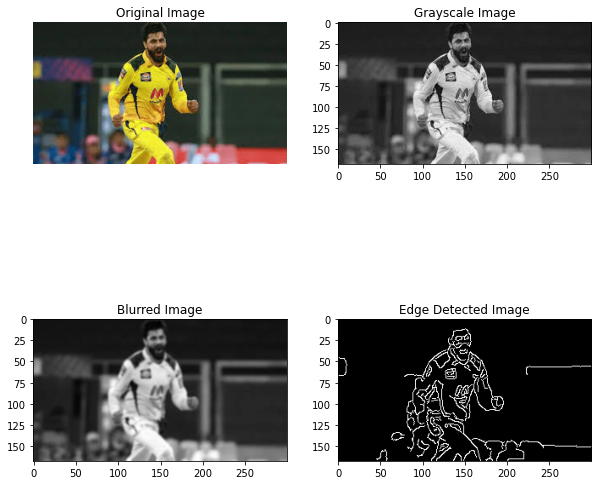

In [6]:
if image is None:
    print("error: Image not found!")
else:
    image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    axs[0, 0].imshow(image_rgb)
    axs[0, 0].set_title("Original Image")
    axs[0, 1].imshow(gray, cmap="gray")
    axs[0, 1].set_title("Grayscale Image")

    axs[1, 0].imshow(blurred, cmap="gray")
    axs[1, 0].set_title("Blurred Image")

    axs[1, 1].imshow(edges, cmap="gray")
    axs[1, 1].set_title("Edge Detected Image")
for ax in axs.flat:
    ax.axis("off")
    plt.show()

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

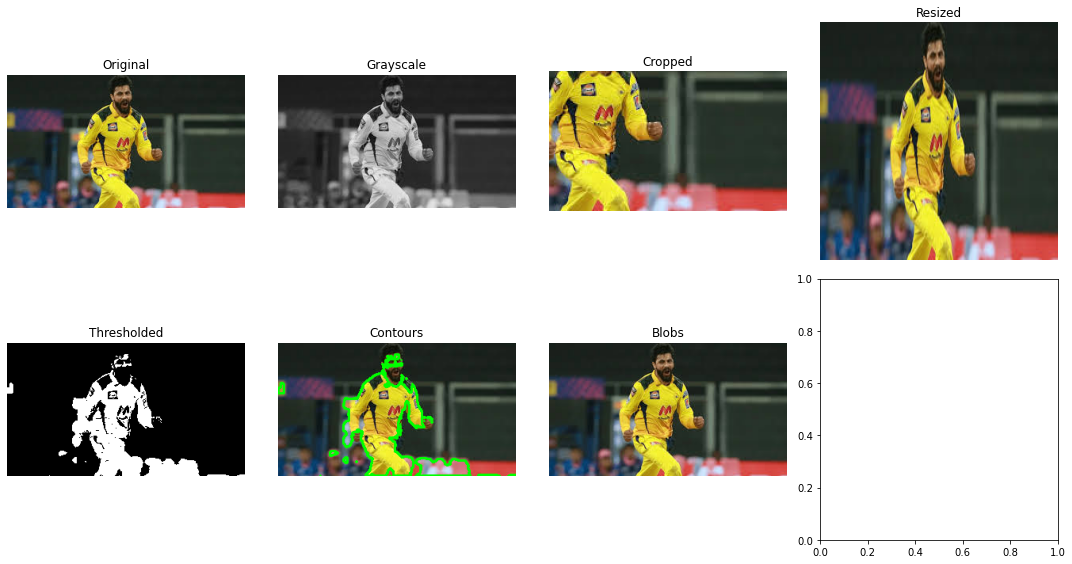

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("jadeja.jpg")
if image is None:
    print("Error: Image not found!")
    exit()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cropped = image[50:300, 100:400]
resized = cv2.resize(image, (300, 300))
_, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 100
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(thresholded)
blob_image = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
titles = ["Original", "Grayscale", "Cropped", "Resized", "Thresholded", "Contours", "Blobs"]
images = [image, gray, cropped, resized, thresholded, contour_image, blob_image]
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
for i, ax in enumerate(axs.flat[:7]):
    cmap = "gray" if len(images[i].shape) == 2 else None
    ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB), cmap=cmap)
    ax.set_title(titles[i])
    ax.axis("off")
plt.tight_layout()
plt.show()


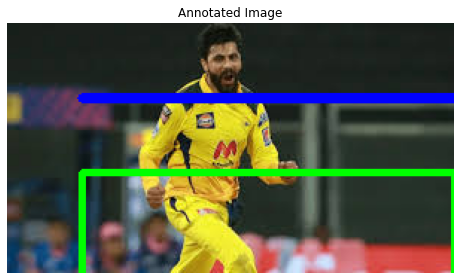

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("jadeja.jpg") 
if image is None:
    print("Error: Image not found!")
    exit()
cv2.line(image, (50, 50), (300, 50), (255, 0, 0), 5)
cv2.rectangle(image, (50, 100), (300, 200), (0, 255, 0), 3)
cv2.circle(image, (200, 300), 50, (0, 0, 255), -1)
cv2.ellipse(image, (250, 400), (100, 50), 0, 0, 180, (255, 255, 0), 2)
cv2.putText(image, "OpenCV Annotation", (50, 450), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Annotated Image")
plt.show()


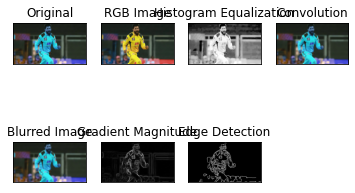

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('jadeja.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist_eq = cv2.equalizeHist(gray)
kernel = np.ones((3, 3), np.float32) / 9 
conv_img = cv2.filter2D(img, -1, kernel)
blurred = cv2.GaussianBlur(img, (5, 5), 0)
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
gradient = cv2.magnitude(sobel_x, sobel_y)
edges = cv2.Canny(gray, 100, 200)
titles = ['Original', 'RGB Image', 'Histogram Equalization', 'Convolution', 
          'Blurred Image', 'Gradient Magnitude', 'Edge Detection']
images = [img, img_rgb, hist_eq, conv_img, blurred, gradient, edges]
for i in range(7):
    plt.subplot(2, 4, i+1), plt.imshow(images[i], cmap='gray' if i != 1 else None)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


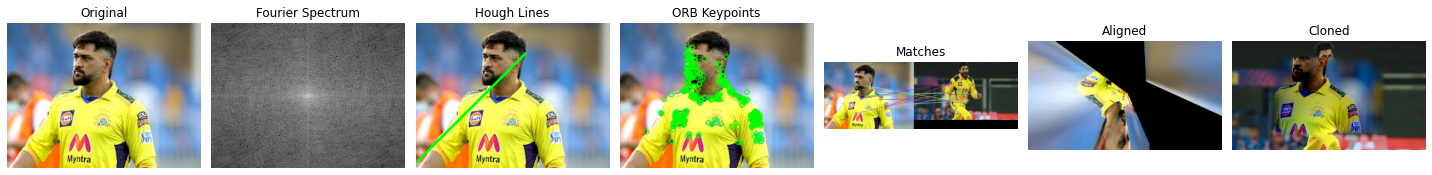

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def load_image(path):
    img = cv2.imread(path)
    if img is None:
        exit(f"Error: Image '{path}' not found!")
    return img
image_path_1 = "dhoni2.jpg" 
image_path_2 = "jadeja.jpg"  
image, image2 = load_image(image_path_1), load_image(image_path_2)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fshift = np.fft.fftshift(np.fft.fft2(gray))
log_spectrum = np.log(np.abs(fshift) + 1)
edges = cv2.Canny(image, 50, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)
line_image = image.copy()
if lines is not None: 
    for line in lines:
        cv2.line(line_image, tuple(line[0][:2]), tuple(line[0][2:]), (0, 255, 0), 2)
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(gray, None)
kp2, des2 = orb.detectAndCompute(cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY), None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = sorted(bf.match(des1, des2), key=lambda x: x.distance)[:10]
match_image = cv2.drawMatches(image, kp1, image2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
if len(matches) >= 4:  
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    if H is not None:
        aligned_image = cv2.warpPerspective(image, H, (image2.shape[1], image2.shape[0]))
    else:
        aligned_image = None
else:
    aligned_image = None
mask = np.zeros_like(gray)
cv2.fillPoly(mask, [np.array([[50, 50], [200, 50], [200, 200], [50, 200]])], 255)
mask_resized = cv2.resize(mask, (image2.shape[1], image2.shape[0]))
cloned_image = cv2.seamlessClone(image, image2, mask_resized, (image2.shape[1] // 2, image2.shape[0] // 2), cv2.NORMAL_CLONE)
titles = ["Original", "Fourier Spectrum", "Hough Lines", "ORB Keypoints", "Matches", "Aligned", "Cloned"]
images = [image, log_spectrum, line_image, cv2.drawKeypoints(image, kp1, None, color=(0, 255, 0)),
          match_image, aligned_image, cloned_image]
valid_images = [(img, title) for img, title in zip(images, titles) if img is not None]
fig, axs = plt.subplots(1, len(valid_images), figsize=(20, 5))
for ax, (img, title) in zip(axs, valid_images):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if len(img.shape) == 3 else img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")
plt.tight_layout()
plt.show()

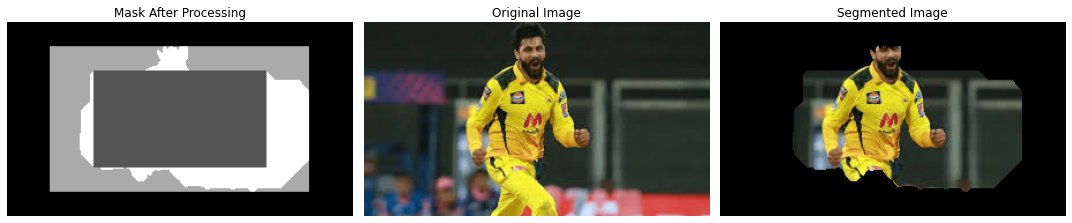

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("jadeja.jpg")
if image is None:
    print("Error: Image not found!")
    exit()

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create an empty mask 
mask = np.full(image.shape[:2], 2, dtype=np.uint8)  # Initial mask with "possible foreground"

# Manually mark the sure background and sure foreground
height, width = image.shape[:2]

# Define sure foreground (center region)
mask[height // 4: 3 * height // 4, width // 4: 3 * width // 4] = 1  # Sure foreground

# Define sure background (edges)
mask[:height // 8, :] = 0  # Top edge -> Sure background
mask[-height // 8:, :] = 0  # Bottom edge -> Sure background
mask[:, :width // 8] = 0  # Left edge -> Sure background
mask[:, -width // 8:] = 0  # Right edge -> Sure background

# Create models for GrabCut
bg_model = np.zeros((1, 65), np.float64)
fg_model = np.zeros((1, 65), np.float64)

# Apply GrabCut using the manual mask
cv2.grabCut(image, mask, None, bg_model, fg_model, iterCount=5, mode=cv2.GC_INIT_WITH_MASK)

# Convert mask: 0,2 -> background (black), 1,3 -> foreground (white)
mask_final = np.where((mask == 1) | (mask == 3), 1, 0).astype("uint8")

# Extract the foreground
segmented_image = image * mask_final[:, :, np.newaxis]

# Display results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(mask, cmap='gray')
ax[0].set_title("Mask After Processing")
ax[0].axis("off")

ax[1].imshow(image)
ax[1].set_title("Original Image")
ax[1].axis("off")

ax[2].imshow(segmented_image)
ax[2].set_title("Segmented Image")
ax[2].axis("off")

plt.tight_layout()
plt.show()
